In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [2]:
coin_flips_prior = np.random.binomial(n = 1, p = 0.5, size = 1000)
coin_flips_prior[:5]

array([0, 1, 1, 0, 1])

In [3]:
params = np.linspace(0,1,100)
params

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [4]:
p_prior = np.array([np.product(st.bernoulli.pmf(coin_flips_prior, p)) for p in params])

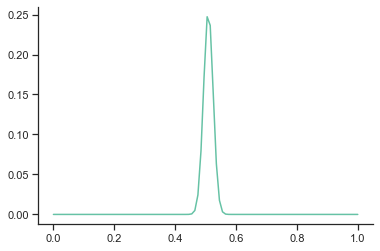

In [5]:
p_prior = p_prior/np.sum(p_prior)
plt.plot(params, p_prior)
sns.despine()

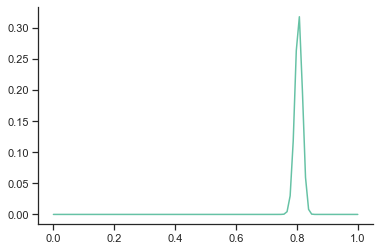

In [12]:
coin_flips_observed = np.random.binomial(n=1, p=0.8, size = 1000)
p_observed = np.array([np.product(st.bernoulli.pmf(coin_flips_observed, p)) for p in params])
p_observed = p_observed/np.sum(p_observed)

plt.plot(params, p_observed)
sns.despine()

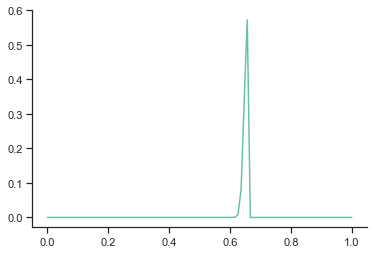

In [13]:
p_posterior = [p_prior[i] * p_observed[i] for i in range(len(p_prior))]
p_posterior = p_posterior/np.sum(p_posterior)
plt.plot(params, p_posterior)
sns.despine()

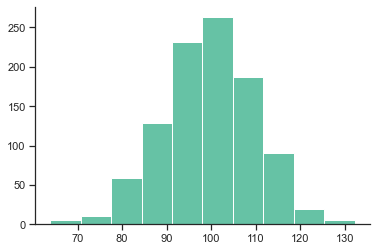

In [14]:
prior_distribution = np.random.normal(100, 10, 1000)
plt.hist(prior_distribution)
sns.despine()

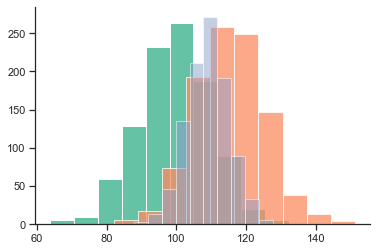

In [20]:
np.random.seed(5)
observed_distribution = np.random.normal(115, 10, 1000)
mu = [100] * 1000
sigma = [10] * 1000

mu[0] = (10**2*observed_distribution[0] + (10**2)*100)/(10**2+10**2)
sigma[0] = (10**2*10**2)/(10**2+10**2)

for i in range(1000):
    if i == 999:
        break
    mu[i + 1] = (sigma[i]**2*observed_distribution[i+1] + (10**2)*mu[i] )/(sigma[i]**2+10**2)
    sigma[i + 1] = (sigma[i]*10**2)/(sigma[i]+10**2)
    

posterior_distributions = [[]] * 20
    
for i in range(20):
    posterior_distributions[i] = np.random.normal(mu[i], sigma[i], 1000)
    
plt.hist(prior_distribution)
plt.hist(observed_distribution, alpha = 0.75)
plt.hist(posterior_distributions[15], alpha = 0.5)
sns.despine()